In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree 

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.shape

(400, 11)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [7]:
df['Sales'] = pd.Categorical(df['Sales'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), int64(7), object(3)
memory usage: 42.9+ KB


In [9]:
print(df.Sales.value_counts())
print(df.CompPrice.value_counts())
print(df.Income.value_counts())
print(df.ShelveLoc.value_counts())

7.8      4
4.1      3
5.87     3
9.32     3
6.53     3
        ..
6.37     1
6.23     1
6.18     1
6.15     1
16.27    1
Name: Sales, Length: 336, dtype: int64
121    16
122    14
131    14
123    13
115    12
       ..
94      1
161     1
97      1
88      1
85      1
Name: CompPrice, Length: 73, dtype: int64
69     11
42     10
32      8
100     8
67      7
       ..
27      1
114     1
43      1
112     1
23      1
Name: Income, Length: 98, dtype: int64
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [10]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


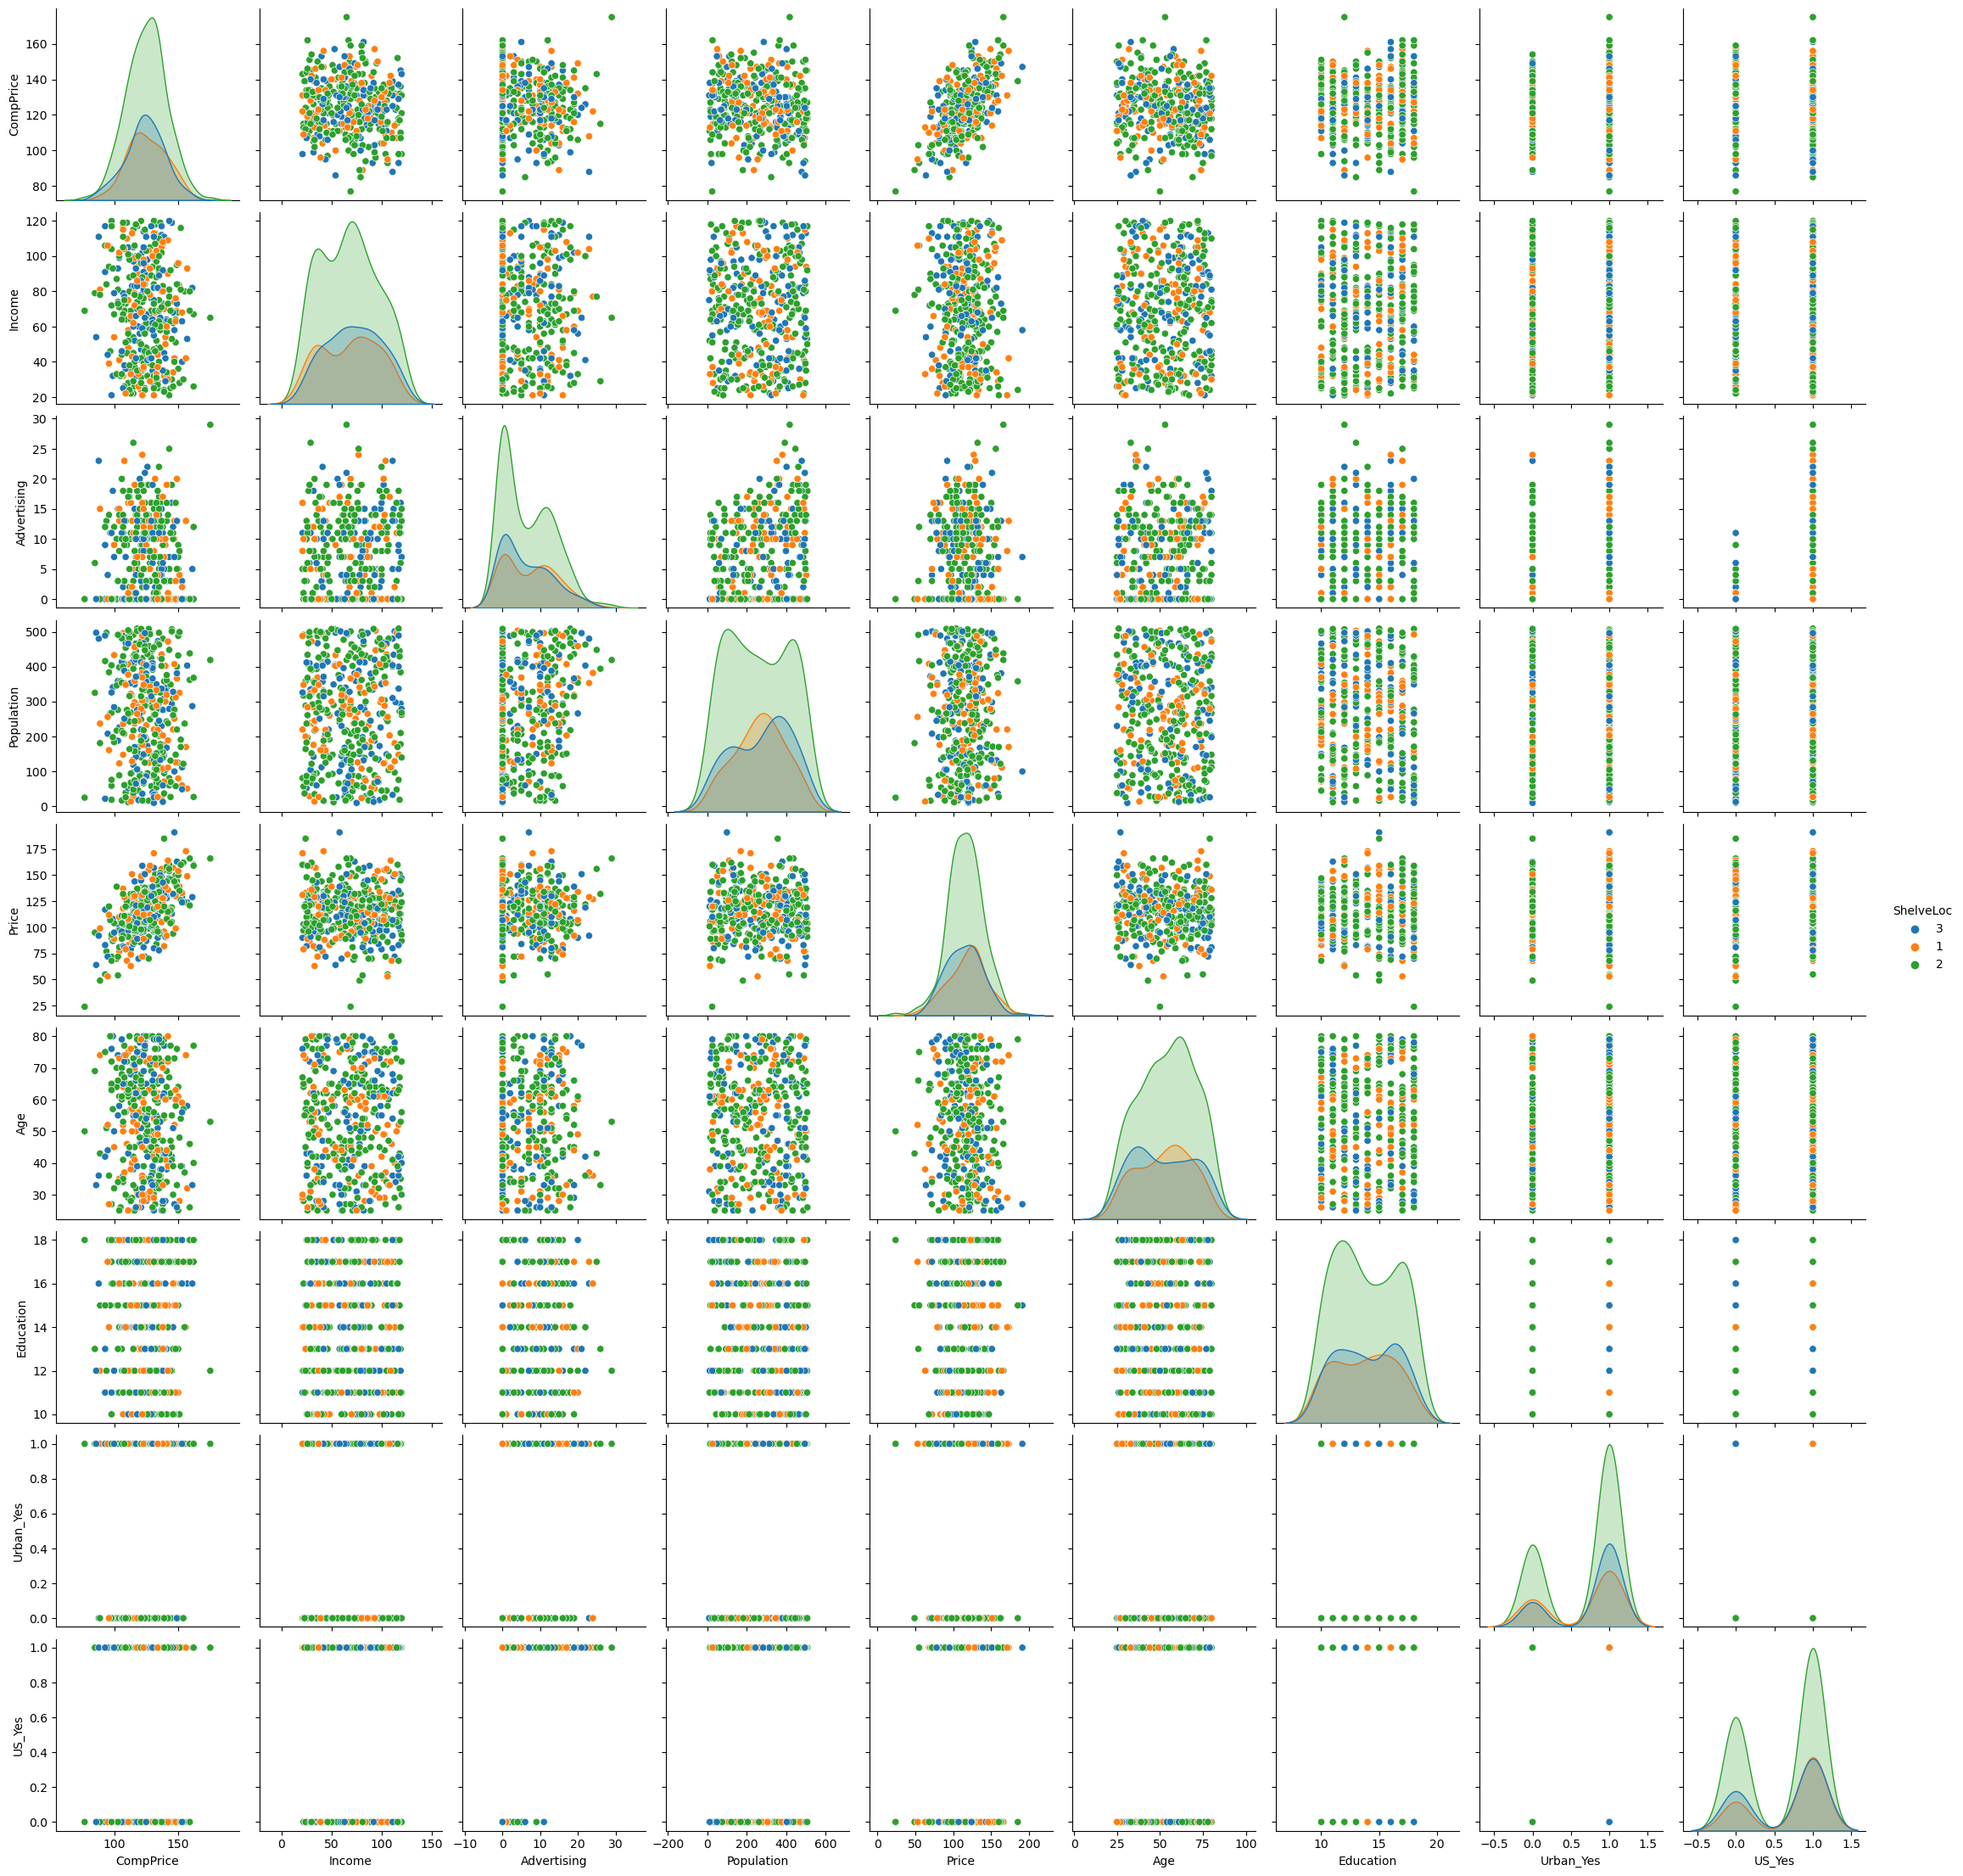

In [55]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'ShelveLoc')

In [11]:
oneHotCols=["Urban","US"]
df=pd.get_dummies(df, columns=oneHotCols,drop_first=True)
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [12]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban_Yes    400 non-null    uint8   
 10  US_Yes       400 non-null    uint8   
dtypes: category(2), int64(7), uint8(2)
memory usage: 34.8 KB


## Split Data

In [14]:
X = df.iloc[:,0:6]
y = df['ShelveLoc']

In [15]:
X

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [16]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: category
Categories (3, int64): [3, 1, 2]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
from sklearn import tree

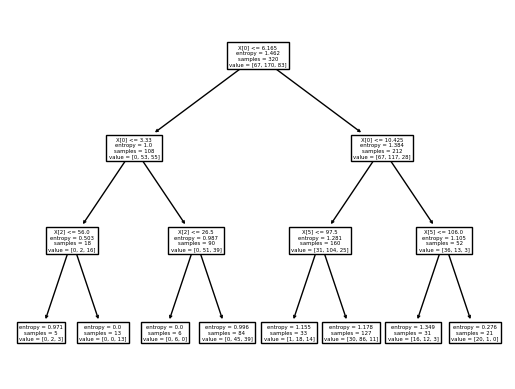

In [38]:
#PLot the decision tree
tree.plot_tree(model);

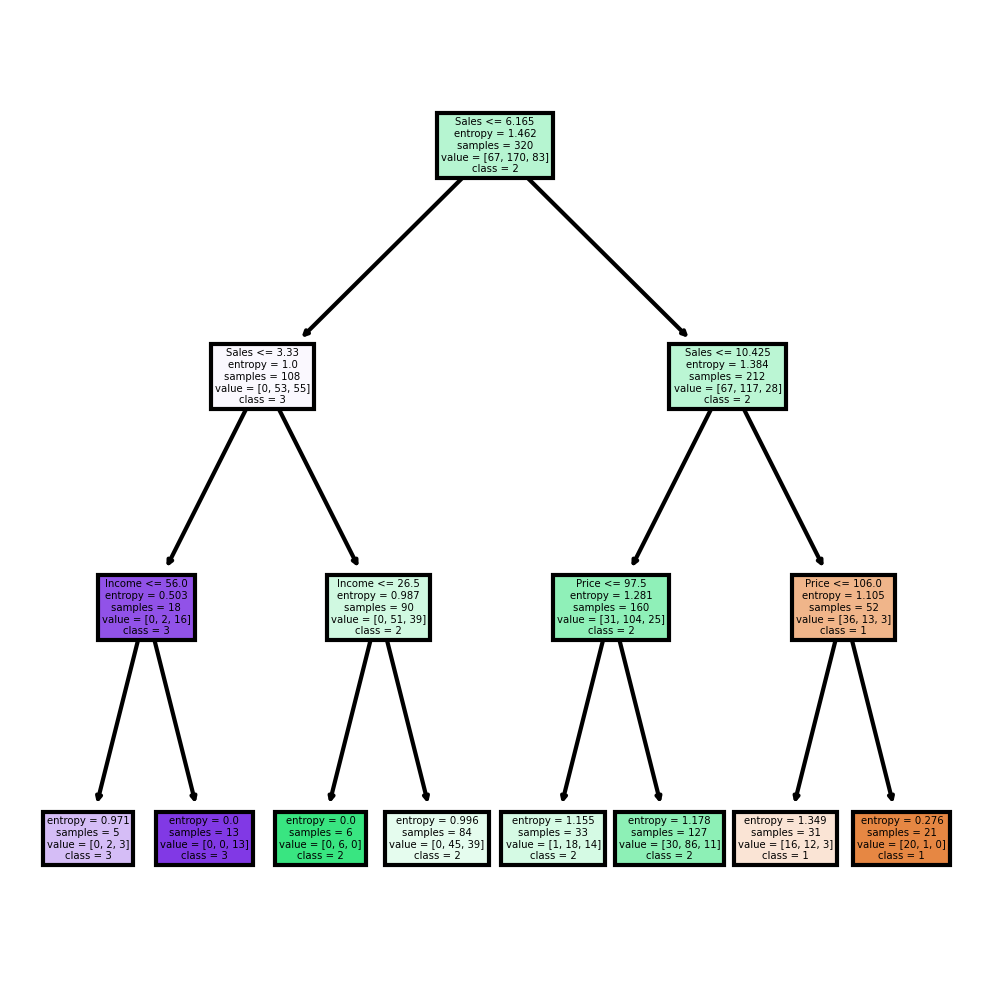

In [39]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [40]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    63
1    13
3     4
dtype: int64

In [41]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong p

col_0,1,2,3
ShelveLoc,,,
3,0,12,1
1,8,10,0
2,5,41,3


In [42]:
# Accuracy 
np.mean(preds==y_test)

0.625

# Building Decision Tree Classifier (CART) using Gini Criteria

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [44]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test)

0.625

# Decision Tree Regression Example

In [47]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [50]:
array = df.values
x = array[:,0:3]
y = array[:,3]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [53]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
#Find the accuracy
model.score(X_test,y_test)

-1.2815947920168713